#**Face Recognition using Olivetti Dataset**
In this project, we are going to perform a face recognition task using the face images in the Olivetti data set. A facial recognition system is a technology capable of matching a human face from a digital image or a video frame against a database of faces, typically employed to authenticate users through ID verification services, works by pinpointing and measuring facial features from a given image. 

The steps for face recognition in this project are as follows:
1. Importing the necessary packages
2. Loading the Olivetti Dataaset from sklearn datasets
3. Find optimal number of Principal Components (Eigen Vectors)
4. Constructing the Machine Learning Models
5. Checking the accuracy score according to three different classification models.
6. Checking the cross-validation score according to three different classification models.
7. Parameter optimization for getting the best model.

###**1. Importing the necessary packages.**





In [13]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

###**2. Loading the Olivetti Dataaset from sklearn datasets.**

Brief information about Olivetti Dataset:

- Face images taken between April 1992 and April 1994.
- There are ten different image of each of 40 distinct people
- There are 400 face images in the dataset
- Face images were taken at different times, variying ligthing, facial express - and facial detail
- All face images have black background
- The images are gray level
- Size of each image is 64x64
- Image pixel values were scaled to [0, 1] interval
- Names of 40 people were encoded to an integer from 0 to 39

Load the dataset and separate Features and Labels

In [2]:
# Load the dataset
olivetti_data = fetch_olivetti_faces()

# Separate the data into Features(X) and Labels(y)
# There are 400 images of 40 people (40 people, 10 images per person)
features = olivetti_data.data
#Targets represent variables(people) with integers (face ids)
targets = olivetti_data.target

# Check the shape of the features and labels
print(features.shape)
print(targets.shape)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
(400, 4096)
(400,)


Split the dataset into Test and Trainin Data

In [3]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    targets, 
                                                    test_size = 0.25, 
                                                    stratify = targets, 
                                                    random_state = 120)

Check the images of the 40 People

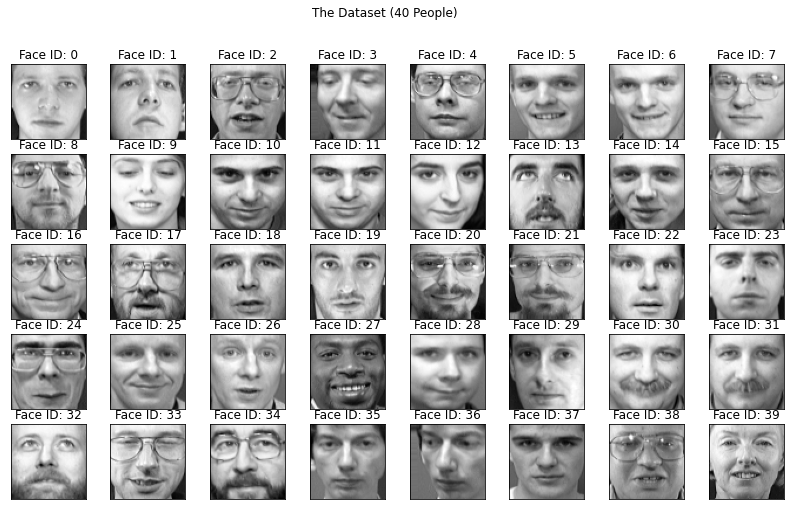

In [4]:
fig, sub_plots = plt.subplots(nrows = 5, ncols = 8, figsize = (14, 8))
sub_plots = sub_plots.flatten()

for unique_user_id in np.unique(targets):
  image_index = unique_user_id * 8
  sub_plots[unique_user_id].imshow(features[image_index].reshape(64, 64), cmap = 'gray')
  sub_plots[unique_user_id].set_xticks([])
  sub_plots[unique_user_id].set_yticks([])
  sub_plots[unique_user_id].set_title(f"Face ID: {unique_user_id}")

plt.suptitle("The Dataset (40 People)")
plt.show()

Let's print the 10 images of first person with face id = 0

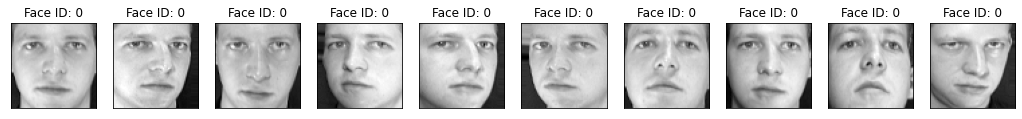

In [5]:
fig, sub_plots = plt.subplots(nrows = 1, ncols = 10, figsize = (18, 9))

for j in range(10):
  sub_plots[j].imshow(features[j].reshape(64, 64), cmap = 'gray')
  sub_plots[j].set_xticks([])
  sub_plots[j].set_yticks([])
  sub_plots[j].set_title(f"Face ID: 0")

plt.show()


###**3. Find optimal number of Principal Components (Eigen Vectors).**

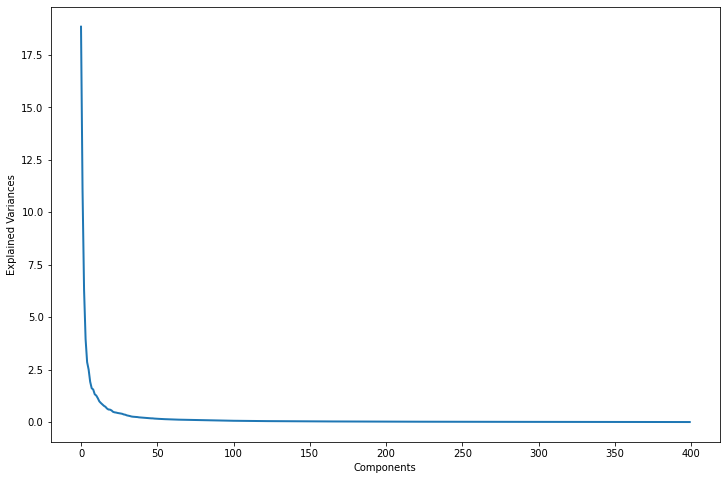

In [6]:
pca = PCA()
pca.fit(features)

plt.figure(1, figsize = (12, 8))
plt.plot(pca.explained_variance_, linewidth = 2)
plt.xlabel("Components")
plt.ylabel("Explained Variances")
plt.show()

With the help of the above figure it is observed that the Maximum Principal Compnents are 100.

Now let's find out the optimal number of Eigenfaces.

In [14]:
pca = PCA(n_components = 100, whiten = True)
pca.fit(X_train)
X_pca = pca.fit_transform(features)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
number_of_eigenfaces = len(pca.components_)
print(number_of_eigenfaces)

100


We have got the number of eigenfaces as 100. Now lets visualise them on graph.

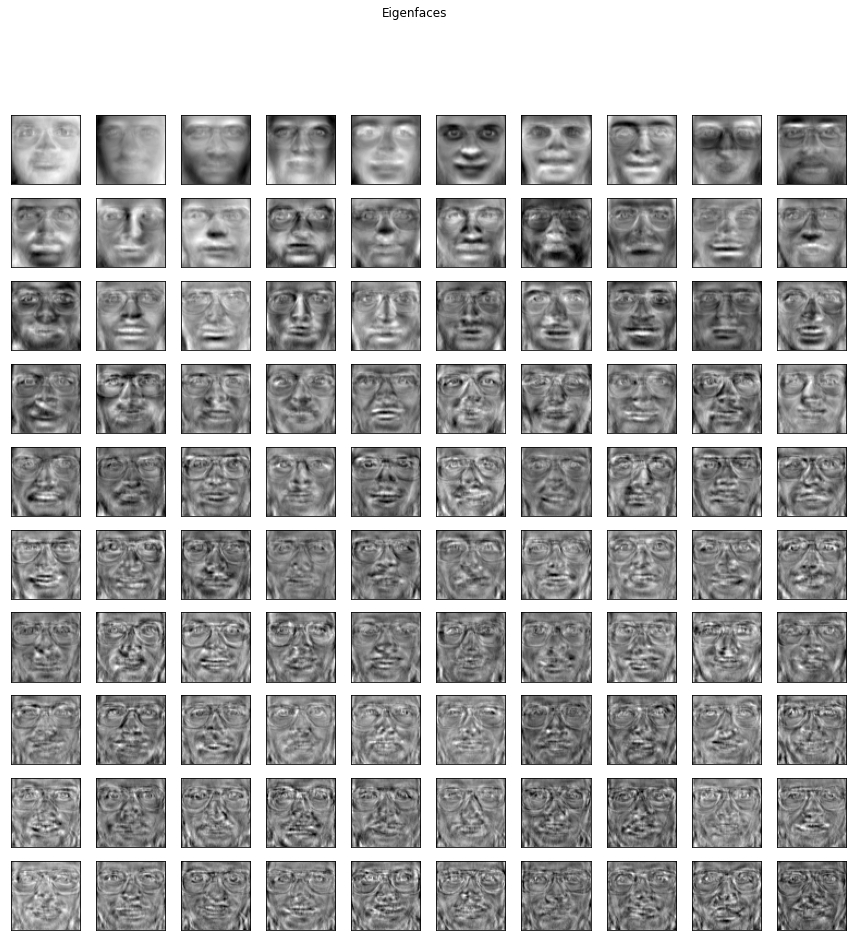

In [8]:
eigen_faces = pca.components_.reshape((number_of_eigenfaces, 64, 64))
fig, sub_plots = plt.subplots(nrows = 10, ncols = 10, figsize = (15, 15))
sub_plots = sub_plots.flatten()

for i in range(number_of_eigenfaces):
  sub_plots[i].imshow(eigen_faces[i], cmap = 'gray')
  sub_plots[i].set_xticks([])
  sub_plots[i].set_yticks([])

plt.suptitle("Eigenfaces")
plt.show()

###**4. Constructing the Machine Learning Models.**

In [10]:
# Check the sizes of transformed features
print(features.shape)
print(X_train_pca.shape)

(400, 4096)
(300, 100)


By applying the PCA we have reduced the number of principal components from 4096 to 100.

Now we are going to create 3 models for our project. They are as follows:
1. Lgoistic Regression
2. Support Vector Machine
3. Naive Bayes Classifier

In [ ]:
models = [("Logistic Regression", LogisticRegression()), ("Support Vector Machine", SVC()),("Naive Bayes Classifier", GaussianNB())]

###**5. Checking the accuracy score according to three different classification models.**

In [12]:
for name, model in models:
  classifier_model = model
  classifier_model.fit(X_train_pca, y_train)
  y_predicted = classifier_model.predict(X_test_pca)
  print(f"Results with {name}")
  print(f"Accuracy Score: {metrics.accuracy_score(y_test, y_predicted)}\n")

Results with Logistic Regression
Accuracy Score: 0.97

Results with Support Vector Machine
Accuracy Score: 0.98

Results with Naive Bayes Classifier
Accuracy Score: 0.89



Here are the results of the different models performance.


| Model | Accuracy |
| --- | --- |
| Logistic Regression | 97% |
| Support Vector Machine | 98% |
| Naive Bayes Classifier | 89% |

###**6. Checking the cross-validation score according to three different classification models.**

In [16]:
for name, model in models:
  # Instantiate a new KFolds classifier
  kfold = KFold(n_splits = 5, shuffle = True, random_state = 0)
  cv_scores = cross_val_score(model, X_pca, targets, cv = kfold)
  print(f"Mean of the cross-validation scores: {cv_scores.mean()}")

Mean of the cross-validation scores: 0.9375
Mean of the cross-validation scores: 0.8575000000000002
Mean of the cross-validation scores: 0.7725


Here are the results of the different models performance after applying KFolds.


| Model | Accuracy |
| --- | --- |
| Logistic Regression | 93% |
| Support Vector Machine | 85% |
| Naive Bayes Classifier | 77% |

The performance of the models after applying KFods is not that much good, and it is better in the previous run only. 

###**7. Parameter optimization for getting the best model using GridSearchCV**